In [61]:
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from pymoc import MOC

from lf.lf import volume, plot_LF

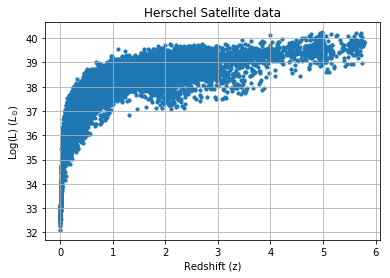

In [64]:

t = Table.read('dustlumin.fits')['redshift','cigale_dustlumin']

x = []
y = []

for i in t['redshift']:
    x.append(i)
    
for i in t['cigale_dustlumin']:
    y.append(i)

plt.scatter(x,np.log10(y), s = 10)
plt.title('Herschel Satellite data')
plt.xlabel('Redshift (z)')
plt.ylabel('Log(L) ($L_{\odot}$)')
plt.grid()
plt.show()
plt.savefig('Luminosity_vs_redshift.png')

In [65]:
#x2 = []
#y2 = []
#
#counter = 0
#
#for i in y:
#    
#    if i < (10**38):
#        
#        del y[counter]
#        del x[counter]
#        
#    counter += 1
#    
#counter2 = 0
#
#for i in x:
#    if i > 2:
#        
#        del x[counter2]
#        del y[counter2]
#        
#    counter2 +=1
#    
#for i in y:
#    
#    if i < (10**38):
#        
#        del y[counter]
#        del x[counter]
#        
#    counter += 1
#    
#counter2 = 0
#
#for i in x:
#    if i > 2:
#        
#        del x[counter2]
#        del y[counter2]
#        
#    counter2 +=1
#    
#for i in y:
#    
#    if i < (10**38):
#        
#        del y[counter]
#        del x[counter]
#        
#    counter += 1
#    
#counter2 = 0
#
#for i in x:
#    if i > 2:
#        
#        del x[counter2]
#        del y[counter2]
#        
#    counter2 +=1
#    
#plt.scatter(x,np.log10(y), s = 10)
#plt.show()
#

C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


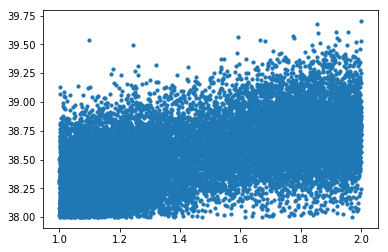

In [66]:
x = t['redshift']
y = t['cigale_dustlumin']
mask_z12 = y < (10**38)
mask_z12 |= x > 2
mask_z12 |= x < 1




y = y[~mask_z12]
x = x[~mask_z12]
plt.scatter(x,np.log10(y), s = 10)
plt.show()

In [67]:
#counter3 = 0
#
#for i in x:
#    if i < 1:
#        
#        del x[counter3]
#        del y[counter3]
#        
#    counter3 +=1
#    
#counter3 = 0
#
#for i in x:
#    if i < 1:
#        
#        del x[counter3]
#        del y[counter3]
#        
#    counter3 +=1
#    
#plt.scatter(x,np.log10(y), s = 10)
#plt.show()    
#    

1e+38
878
1.25892541179e+38
1349
1.58489319246e+38
1742
1.99526231497e+38
2115
2.51188643151e+38
2200
3.16227766017e+38
2213
3.98107170553e+38
2067
5.01187233627e+38
1775
6.3095734448e+38
1261
7.94328234724e+38
878
1e+39
555
1.25892541179e+39
331
1.58489319246e+39
135
1.99526231497e+39
90
2.51188643151e+39
26
3.16227766017e+39
11
3.98107170553e+39
4
5.01187233627e+39
1
6.3095734448e+39
0
7.94328234724e+39
0


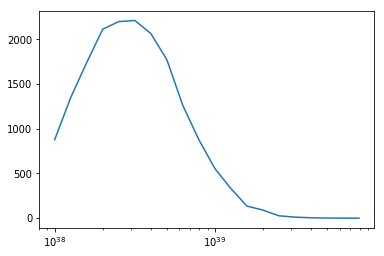

In [68]:
nbins = 20 
L_min = 10**38
L_max = 10**40
galaxy_sample = np.array(y)
galaxy_sample = galaxy_sample[~np.isnan(galaxy_sample)]


galaxy_bins = Table()
#galaxy_bins.add_column(Column(data=np.linspace(L_min, L_max, nbins), name='L_centre_values'))
galaxy_bins.add_column(Column(data=np.logspace(38, 40, num=nbins+1, base=10.0), name='L_centre_values'))

#dL = (L_max-L_min)/20

galaxy_bins.add_column(Column(np.full(len(galaxy_bins), np.nan), name='dN_by_dL'))

n=0
for gal_bin in np.arange(nbins):
    L=galaxy_bins['L_centre_values'][gal_bin]
    print(L)
    dN_by_dL = np.sum((galaxy_sample > (L) ) & (galaxy_sample < galaxy_bins['L_centre_values'][gal_bin+1]))
    print(dN_by_dL)
    galaxy_bins['dN_by_dL'][gal_bin] = dN_by_dL
    n +=1
    
    
plt.plot( np.array(galaxy_bins['L_centre_values']), np.array(galaxy_bins['dN_by_dL']))
plt.xscale('log')
#plt.plot(np.array([1,2,3,4]), np.array([5,6,5,6]))
plt.show()


C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


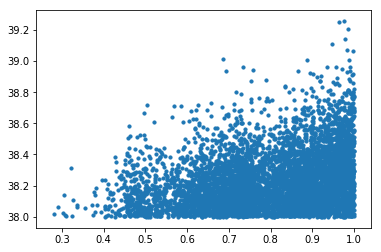

In [69]:
x = t['redshift']
y = t['cigale_dustlumin']
mask_z01 = y < (10**38)
mask_z01 |= x > 1
mask_z01 |= x < 0




y = y[~mask_z01]
x = x[~mask_z01]
plt.scatter(x,np.log10(y), s = 10)
plt.show()

1e+38
871
1.1220184543e+38
819
1.25892541179e+38
743
1.41253754462e+38
696
1.58489319246e+38
638
1.77827941004e+38
518
1.99526231497e+38
438
2.23872113857e+38
353
2.51188643151e+38
292
2.81838293126e+38
198
3.16227766017e+38
159
3.54813389234e+38
127
3.98107170553e+38
93
4.46683592151e+38
68
5.01187233627e+38
42
5.6234132519e+38
25
6.3095734448e+38
19
7.07945784384e+38
12
7.94328234724e+38
11
8.91250938134e+38
4


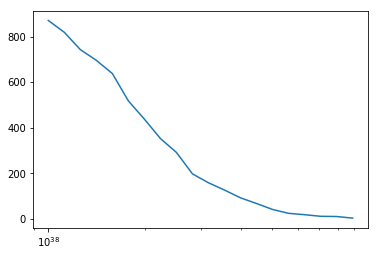

In [70]:
nbins = 20 
L_min = 10**38
L_max = 10**39
galaxy_sample = np.array(y)
galaxy_sample = galaxy_sample[~np.isnan(galaxy_sample)]


galaxy_bins = Table()
#galaxy_bins.add_column(Column(data=np.linspace(L_min, L_max, nbins), name='L_centre_values'))
galaxy_bins.add_column(Column(data=np.logspace(38, 39, num=nbins+1, base=10.0), name='L_centre_values'))

#dL = (L_max-L_min)/20

galaxy_bins.add_column(Column(np.full(len(galaxy_bins), np.nan), name='dN_by_dL'))

n=0
for gal_bin in np.arange(nbins):
    L=galaxy_bins['L_centre_values'][gal_bin]
    print(L)
    dN_by_dL = np.sum((galaxy_sample > (L) ) & (galaxy_sample < galaxy_bins['L_centre_values'][gal_bin+1]))
    print(dN_by_dL)
    galaxy_bins['dN_by_dL'][gal_bin] = dN_by_dL
    n +=1
    
    
plt.plot( np.array(galaxy_bins['L_centre_values']), np.array(galaxy_bins['dN_by_dL']))
plt.xscale('log')
#plt.plot(np.array([1,2,3,4]), np.array([5,6,5,6]))
plt.show()


In [71]:
cosmo = FlatLambdaCDM(H0=100. , Om0 = (1-0.7))
dV_z0  = cosmo.comoving_volume(0)
dV_z1  = cosmo.comoving_volume(1)
dV_z2  = cosmo.comoving_volume(2)


en1_moc = MOC(filename='ELAIS-N1_MOC.fits')
area = en1_moc.area
def volume(z1,z2,cosmo, moc =en1_moc):
    v = (cosmo.comoving_volume(z2) - cosmo.comoving_volume(z1)) * (moc.area/ (4* np.pi))
    return v

print(volume(0.,1.,cosmo))

Lsun = 3.828E26

16965032.12941873 Mpc3


C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


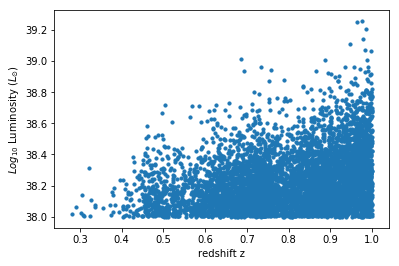

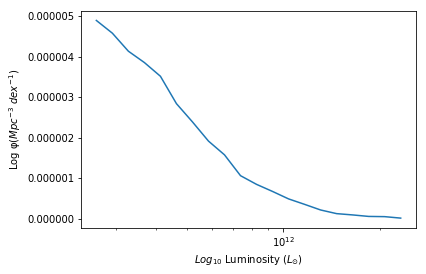

In [75]:
def plot_LF(z1,z2,Lmin,Lmax,table, cosmo=cosmo):
    x = table['redshift']
    y = table['cigale_dustlumin']
    mask_z01 = y < (10**38)
    mask_z01 |= x > z2
    mask_z01 |= x < z1




    y = y[~mask_z01]
    x = x[~mask_z01]
    plt.scatter(x,np.log10(y), s = 10)
    plt.xlabel('redshift z')
    plt.ylabel('$Log_{10}$ Luminosity ($L_{\odot}$)')
    plt.show()

    nbins = 20 
    #L_min = 10**38
    #L_max = 10**39
    galaxy_sample = np.array(y)
    galaxy_sample = galaxy_sample[~np.isnan(galaxy_sample)]


    galaxy_bins = Table()
    #galaxy_bins.add_column(Column(data=np.linspace(L_min, L_max, nbins), name='L_centre_values'))
    galaxy_bins.add_column(Column(data=np.logspace(np.log10(Lmin), np.log10(Lmax), num=nbins+1, base=10.0), name='L_centre_values'))

    #dL = (L_max-L_min)/20

    galaxy_bins.add_column(Column(np.full(len(galaxy_bins), np.nan), name='dN_by_dL'))

    n=0
    for gal_bin in np.arange(nbins):
        L=galaxy_bins['L_centre_values'][gal_bin]
        #print(L)
        dN_by_dL = np.sum((galaxy_sample > (L) ) & (galaxy_sample < galaxy_bins['L_centre_values'][gal_bin+1]))
        #print(dN_by_dL)
        dN_by_dL = dN_by_dL /( volume(z1,z2,cosmo) / (( u.megaparsec)**3 ))
        binwidth = galaxy_bins['L_centre_values'][gal_bin+1] - galaxy_bins['L_centre_values'][gal_bin]
        log_binwidth = (np.log10(galaxy_bins['L_centre_values'][gal_bin+1]/Lsun) 
                            - np.log10(galaxy_bins['L_centre_values'][gal_bin]/Lsun))
        dN_by_dL= dN_by_dL / (log_binwidth)
        
        galaxy_bins['dN_by_dL'][gal_bin] = dN_by_dL
        n +=1
    
    
    plt.plot( np.array(galaxy_bins['L_centre_values'])/Lsun, np.array(galaxy_bins['dN_by_dL']))
    plt.xscale('log')
    plt.xlabel('$Log_{10}$ Luminosity ($L_{\odot}$)')
    plt.ylabel('Log φ($Mpc^{-3}$ $dex^{-1}$)')
    #plt.plot(np.array([1,2,3,4]), np.array([5,6,5,6]))
    plt.show()
    plt.savefig('Luminosity Functions')
    
    
plot_LF(0.0,1.0,10.**38,10.**39,t)

In [76]:
volume(1,2,cosmo)/ (( u.megaparsec)**3 )

<Quantity 48416736.98025384>

0.0


C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
C:\Users\user\Anaconda3\anaconda_4\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


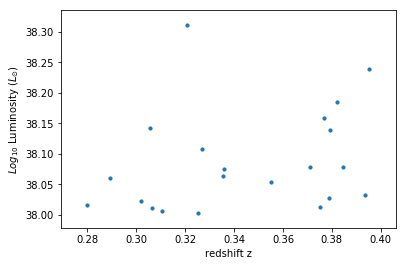

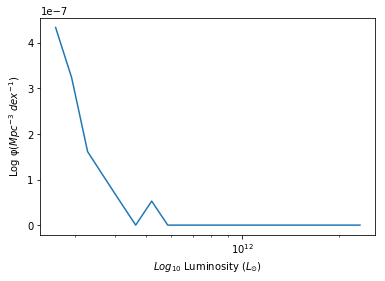

0.4


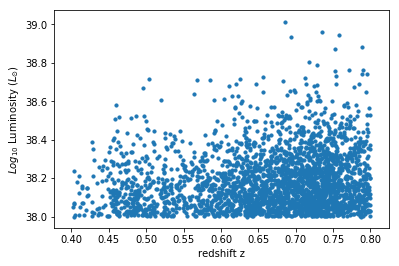

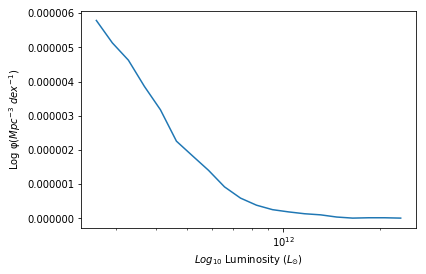

0.8


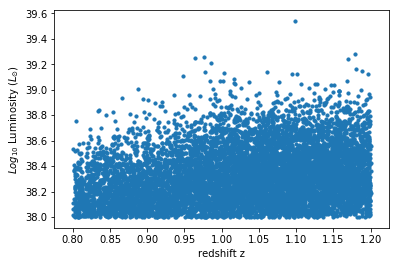

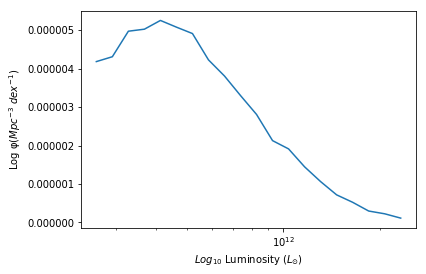

1.2


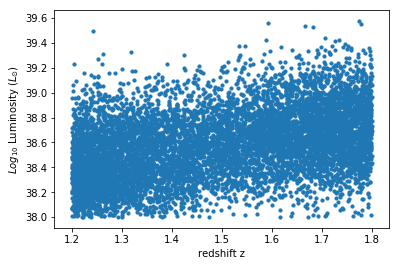

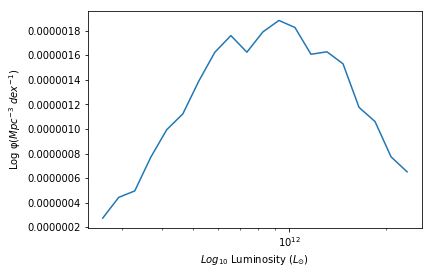

1.8


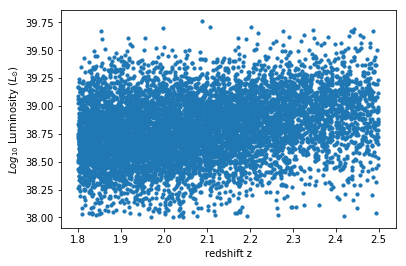

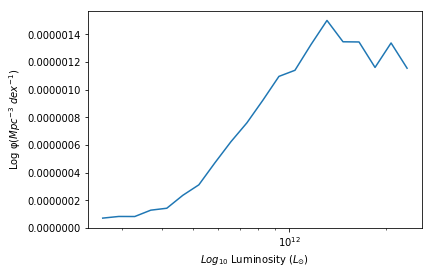

2.5


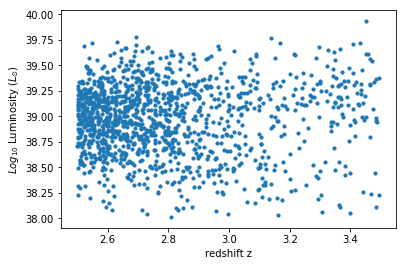

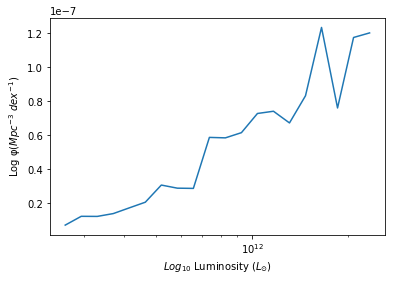

3.5


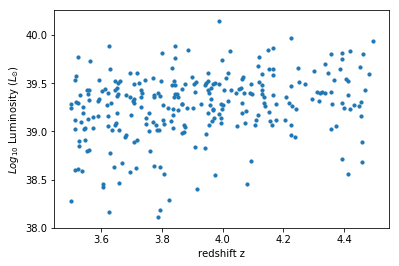

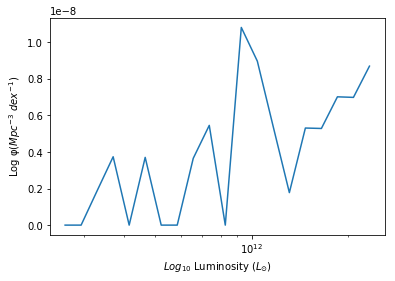

In [77]:
z_bins = [0.0,0.4,0.8,1.2,1.8,2.5,3.5,4.5]
for z in np.arange(len(z_bins)-1):
    print( z_bins[z])
    plot_LF(z_bins[z],z_bins[z+1],10.**38,10.**39,t)